Create compression version of GPT-2 nad BERT model and save the memory =)

## experiment with trainedble / untrainable parameters

| Full | Unfrozen mlp  | Unfrozen mlp + SG 100k  |Unfrozen mlp + SG 30k| Unfrozen all + SG 100k  |Unfrozen all + SG 30k|
| --- | --- | --- | --- | --- | --- |
| 109M | 57M | 2.4M | 0.7M |  55M | 53M |
| 0.52 | 0.46 | 0.0 | 0.0 |  0.48 | 0.5 |


## cola example

The Semantic Textual Similarity Benchmark (Cer et al., 2017) is a collection of sentence pairs drawn from news headlines, video and image captions, and natural language inference data. Each pair is human-annotated with a similarity score from 0 to 5.

In [5]:
import argparse
import torch
import transformers
import torch

from datasets import load_dataset
import pandas as pd

from transformers import Trainer
import evaluate as ev
import numpy as np

# Trainers
from transformers import TrainingArguments, Trainer, EvalPrediction

# Custom trainers
from trainers_custom import TrainerBert1, TrainerBert2, TrainerDoubleOpt

# Custom needed function

from util_trainer import pre_trainer_function, trainer_function
from util import get_dataset, sparse_grad_linear


# Create argument parser
#parser = argparse.ArgumentParser(prog="Test suite for GPT models")
#parser.add_argument("--sparse_grad", action="store_true")
#parser.add_argument("--cuda", type=int)

# Parse arguments
#args = parser.parse_args()

# Select device
device = torch.device("cuda:{}".format(0))

# Load the model and set it into training mode
from transformers import AutoConfig, BertConfig, AutoModelForSequenceClassification, AutoTokenizer

path_name = r"roberta-base"

#dataset

dataset_cola = load_dataset('glue', 'cola')

label_list = dataset_cola["train"].features["label"].names
num_labels = len(label_list)


config = AutoConfig.from_pretrained(
    path_name,
    num_labels=num_labels,
)

model = AutoModelForSequenceClassification.from_pretrained(
    path_name,
    config=config,
)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should pr

In [7]:
config = AutoConfig.from_pretrained(
    r"bert-base-uncased",
    num_labels=num_labels,
)

In [8]:
model1 = AutoModelForSequenceClassification.from_pretrained(
    r"bert-base-uncased",
    config=config,
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [10]:
sum(p.numel() for p in model.parameters())

124647170

In [11]:
sum(p.numel() for p in model1.parameters())

109483778

In [18]:
model1.bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [21]:
model.classifier

RobertaClassificationHead(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (out_proj): Linear(in_features=768, out_features=2, bias=True)
)

In [15]:
len(model.roberta.encoder.layer)

12

In [1]:
import os
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"


In [2]:
import torch
t = torch.load('tensor step 10layer1.pt')

In [3]:
t.shape

torch.Size([16, 128, 768])

In [4]:
t.to_sparse().indices().shape

torch.Size([3, 132096])

In [5]:
t.to_sparse().indices()

tensor([[  0,   0,   0,  ...,  15,  15,  15],
        [  0,   0,   0,  ...,   9,   9,   9],
        [  0,   1,   2,  ..., 765, 766, 767]])

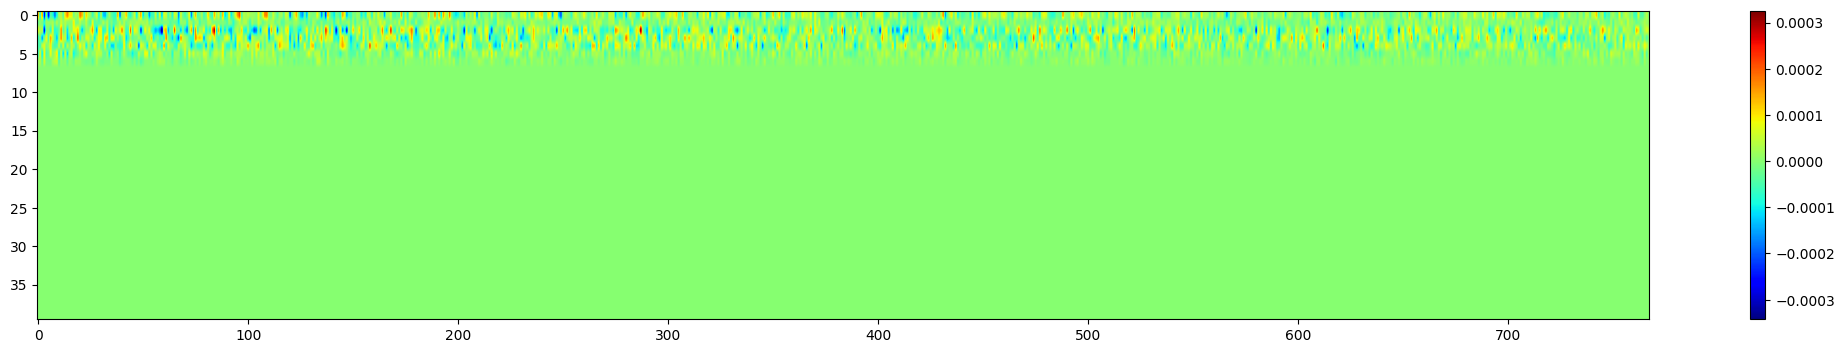

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(26,4))
im = plt.imshow(t[10, :40, :].numpy(), cmap='jet', aspect='auto')

plt.colorbar(im)
plt.show()

In [6]:
t[0, 30:50, 30:50]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0

In [7]:
#!pip install Partial State

In [8]:
import transformers
print (transformers.__version__)

4.30.2


In [66]:
from sparse_grad_matrix_sparse import replace_bert_layers, replace_roberta_layers

[autoreload of sparse_grad_matrix_sparse failed: Traceback (most recent call last):
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/user/conda/lib/python3.9

In [67]:
def sparse_grad_linear(model, UV_dict):
    print ("create bert with sparse grads")
    model = replace_roberta_layers(model, UV_dict)
    print ("created bert with sparse grads")
    return model

In [59]:
def create_space_matrices(model):
    if hasattr(model, "bert") and hasattr(model.bert, "encoder"):
        encoder = model.bert.encoder
    elif hasattr(model, "encoder"):
        encoder = model.encoder
    else:
        raise ValueError("Expected model to have attribute 'encoder' or 'bert.encoder'.")

    for i, layer in enumerate(encoder.layer):
        
        layer.intermediate.dense.create_UV()
          
        layer.output.dense.create_UV()
          
        #print ("new shape", layer.output.dense.weight.shape)
        #print ("\n\n")

    return model

In [60]:
from datasets import load_dataset
import pandas as pd

dataset_cola = load_dataset('glue', 'cola')
dataset_cola.num_rows

{'train': 8551, 'validation': 1043, 'test': 1063}

In [61]:
label_list = dataset_cola["train"].features["label"].names
num_labels = len(label_list)


In [14]:
config

Available objects for config:
    AliasManager
    DisplayFormatter
    HistoryManager
    IPCompleter
    IPKernelApp
    InlineBackend
    LoggingMagics
    MagicsManager
    OSMagics
    PrefilterManager
    ScriptMagics
    StoreMagics
    ZMQInteractiveShell


In [15]:
set(pd.DataFrame(dataset_cola['train']).label)

{0, 1}

In [18]:
#model=model.to('cuda:2')

In [24]:
task_num_labels = num_labels

from transformers import AutoConfig, BertConfig, AutoModelForSequenceClassification, AutoTokenizer

path_name = r"roberta-base"

config = AutoConfig.from_pretrained(
    path_name,
    num_labels=num_labels,
)

model = AutoModelForSequenceClassification.from_pretrained(
    path_name,
    config=config,
)

tokenizer = AutoTokenizer.from_pretrained(path_name)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should pr

In [25]:
task_to_keys = {
    "cola": ("sentence", None),
    "mnli": ("premise", "hypothesis"),
    "mrpc": ("sentence1", "sentence2"),
    "qnli": ("question", "sentence"),
    "qqp": ("question1", "question2"),
    "rte": ("sentence1", "sentence2"),
    "sst2": ("sentence", None),
    "stsb": ("sentence1", "sentence2"),
    "wnli": ("sentence1", "sentence2"),
}
sentence1_key, sentence2_key = task_to_keys['cola']

In [26]:

def preprocess_function(examples):
        # Tokenize the texts
        args = (
            (examples[sentence1_key],) if sentence2_key is None else (examples[sentence1_key], examples[sentence2_key])
        )
        
        
        result = tokenizer.batch_encode_plus(*args, max_length=128, truncation=True, padding="max_length")

        result["label"] = examples["label"]
        return result

In [27]:
dataset_cola['train']

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 8551
})

In [28]:
tokenized_dataset = dataset_cola.map(
            preprocess_function,
            batched=True,
            load_from_cache_file=False
        )

Map:   0%|          | 0/8551 [00:00<?, ? examples/s]

Map:   0%|          | 0/1043 [00:00<?, ? examples/s]

Map:   0%|          | 0/1063 [00:00<?, ? examples/s]

In [29]:
tokenized_dataset['validation']

Dataset({
    features: ['sentence', 'label', 'idx', 'input_ids', 'attention_mask'],
    num_rows: 1043
})

In [30]:
from transformers import Trainer
import evaluate as ev
import numpy as np

from transformers import TrainingArguments, Trainer, EvalPrediction

In [31]:
metric = ev.load("glue", 'cola')

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def compute_metrics(p: EvalPrediction):
        preds_ = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
        preds_ = np.argmax(preds_, axis=1)
        
        result = metric.compute(predictions=preds_, references=p.label_ids)
        if True:
            result["combined_score"] = np.mean(list(result.values())).item()
            return result
        else:
            return {"accuracy": (preds_ == p.label_ids).astype(np.float32).mean().item()}

In [34]:
training_args1 = TrainingArguments(
    learning_rate=5e-5,
    num_train_epochs=1,
    evaluation_strategy="steps",
    eval_steps=100,
    max_steps = 31,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=128,
    save_steps=1000,
    overwrite_output_dir=True,
    output_dir="./bert_stsb_128",
    # The next line is important to ensure the dataset labels are properly passed to the model
    remove_unused_columns=True,
    seed=297104,
    report_to='none',
    )


training_args2 = TrainingArguments(
    learning_rate=5e-5,
    num_train_epochs=1,
    evaluation_strategy="steps",
    skip_memory_metrics = False,
    eval_steps=100,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=128,
    save_steps=1000,
    overwrite_output_dir=True,
    output_dir="./bert_stsb_128",
    # The next line is important to ensure the dataset labels are properly passed to the model
    remove_unused_columns=True,
    seed=297104,
    report_to='none',
    )

In [43]:
from trainers_custom import TrainerBert1, TrainerBert2, TrainerDoubleOpt

In [36]:
trainer = TrainerBert1(
        model=model,
        args=training_args1,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["validation"],
        compute_metrics = compute_metrics,
)
trainer.make_grad_bank()

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
print ("len small dataset", len(trainer.train_dataset))
print ("lets collect gradients")
train_result = trainer.train()
print ("finishing collecting gradients")
#model = create_space_matrices(model)

len small dataset 8551
lets collect gradients


Step,Training Loss,Validation Loss


finishing collecting gradients


In [16]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [63]:
model.bert.encoder.layer[3].output.dense.U

AttributeError: 'RobertaForSequenceClassification' object has no attribute 'bert'

In [ ]:
from sparse_grad_matrix_sparse import Tucker_Decomposition
import torch

UV_dict = {}

grads1 = torch.stack(trainer.grads1[:160])
u1, VT, U = Tucker_Decomposition(grads1)
UV_dict.update({"output":tuple((U, VT))})
grads2 = torch.stack(trainer.grads2[:160])
u1, VT, U = Tucker_Decomposition(grads2)
UV_dict.update({"interm":tuple((U, VT))})

In [46]:
UV_dict['output']

[autoreload of sparse_grad_matrix_sparse failed: Traceback (most recent call last):
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/user/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/user/conda/lib/python3.9

(tensor([[-0.0201,  0.0002,  0.0093,  ..., -0.0067,  0.0074, -0.0218],
         [-0.0259,  0.0068,  0.0039,  ..., -0.0226,  0.0023, -0.0226],
         [-0.0152, -0.0036,  0.0117,  ..., -0.0199, -0.0081,  0.0064],
         ...,
         [-0.0125, -0.0117,  0.0052,  ...,  0.0105, -0.0192, -0.0228],
         [-0.0108, -0.0158,  0.0139,  ...,  0.0046, -0.0007, -0.0004],
         [-0.0165, -0.0048, -0.0035,  ..., -0.0003,  0.0196, -0.0011]]),
 tensor([[-0.0119,  0.0008, -0.0269,  ...,  0.0216,  0.0267, -0.0105],
         [-0.0390,  0.0321,  0.0355,  ...,  0.0184,  0.0182,  0.0393],
         [ 0.0108, -0.0152,  0.0389,  ..., -0.0415,  0.0732,  0.0131],
         ...,
         [-0.0142, -0.0054, -0.1084,  ..., -0.0177, -0.0203,  0.0301],
         [-0.0450, -0.0311,  0.0315,  ..., -0.0395,  0.0345, -0.0039],
         [-0.0290, -0.0396, -0.0329,  ..., -0.0575, -0.0260,  0.0620]]))

In [68]:
model = sparse_grad_linear(model, UV_dict)

create bert with sparse grads
created bert with sparse grads


In [69]:
trainer.train()

RuntimeError: No CUDA GPUs are available

In [30]:
del grads1, grads2
torch.cuda.empty_cache()

In [ ]:
#trainer = TrainerBert2(
#        model=model,
#        args=training_args2,
#        train_dataset=tokenized_dataset["train"],
#        eval_dataset=tokenized_dataset["validation"],
#        compute_metrics = compute_metrics,
#)


#trainer.create_scheduler(num_training_steps = trainer.max_steps)

#trainer.make_grad_bank()

## BERT sparse

In [ ]:
trainer.train()

In [34]:
model.bert.encoder.layer[3].output.dense.weight.grad

tensor(indices=tensor([], size=(2, 0)),
       values=tensor([], size=(0,)),
       device='cuda:0', size=(768, 3072), nnz=0, layout=torch.sparse_coo)

In [35]:
del trainer
torch.cuda.empty_cache()

In [36]:
## need for check the sparsity of out_grads in UV, do not need in this branch

def hook_fn_backward(module, inp_grad, out_grad):
    module.out_grads = out_grad#@ module.VT.T

modules = model.bert.encoder.layer
for module in modules:
    module.intermediate.dense.register_backward_hook(hook_fn_backward)
    module.output.dense.register_backward_hook(hook_fn_backward)

In [42]:
trainer = TrainerDoubleOpt(
        model=model,
        args=training_args2,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["validation"],
        compute_metrics = compute_metrics,
)


#trainer.create_scheduler(num_training_steps = trainer.max_steps)

trainer.make_grad_bank()

In [43]:
trainer.train()

params ['bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.1.intermediate.dense.weight', 'bert.encoder.layer.1.output.dense.weight', 'bert.encoder.layer.2.intermediate.dense.weight', 'bert.encoder.layer.2.output.dense.weight', 'bert.encoder.layer.3.intermediate.dense.weight', 'bert.encoder.layer.3.output.dense.weight', 'bert.encoder.layer.4.intermediate.dense.weight', 'bert.encoder.layer.4.output.dense.weight', 'bert.encoder.layer.5.intermediate.dense.weight', 'bert.encoder.layer.5.output.dense.weight', 'bert.encoder.layer.6.intermediate.dense.weight', 'bert.encoder.layer.6.output.dense.weight', 'bert.encoder.layer.7.intermediate.dense.weight', 'bert.encoder.layer.7.output.dense.weight', 'bert.encoder.layer.8.intermediate.dense.weight', 'bert.encoder.layer.8.output.dense.weight', 'bert.encoder.layer.9.intermediate.dense.weight', 'bert.encoder.layer.9.output.dense.weight', 'bert.encoder.layer.10.intermediate.dense.weight', '

Step,Training Loss,Validation Loss,Matthews Correlation,Combined Score
100,No log,0.496959,0.433810,0.433810
200,No log,0.444780,0.477905,0.477905
300,No log,0.444480,0.502897,0.502897
400,No log,0.424684,0.515291,0.515291
500,0.449600,0.409058,0.572701,0.572701


/opt/.pyenv/versions/3.8.10/lib/python3.8/site-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/opt/.pyenv/versions/3.8.10/lib/python3.8/site-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/opt/.pyenv/versions/3.8.10/lib/python3.8/site-packages/torch/nn/modules/module.py:1025: UserWarni

TrainOutput(global_step=535, training_loss=0.4473402807645709, metrics={'train_runtime': 326.1663, 'train_samples_per_second': 26.217, 'train_steps_per_second': 1.64, 'total_flos': 562465658595840.0, 'train_loss': 0.4473402807645709, 'init_mem_cpu_alloc_delta': 8192, 'init_mem_gpu_alloc_delta': 0, 'init_mem_cpu_peaked_delta': 0, 'init_mem_gpu_peaked_delta': 0, 'train_mem_cpu_alloc_delta': 1757184, 'train_mem_gpu_alloc_delta': 684841984, 'train_mem_cpu_peaked_delta': 20480, 'train_mem_gpu_peaked_delta': 2035547136, 'before_init_mem_cpu': 9428717568, 'before_init_mem_gpu': 2082969600, 'epoch': 1.0})

## Memory measurement

In [38]:
from transformers import  TrainerCallback
import torch
import numpy as np
import time

class ProfCallback(TrainerCallback):
    def __init__(self, prof):
        self.prof = prof

    def on_step_end(self, args, state, control, **kwargs):
        self.prof.step()


In [39]:
profiler_result_path = 'file.json'
def train_on_epoch(generator, model, loss_function, optimizer):
    model.train()
    epoch_loss = []
    for batch_of_x, batch_of_y in generator:
        optimizer.zero_grad()
        with torch.autograd.profiler.profile(use_cuda=True, record_shapes=True, with_flops=True, profile_memory=True) as prof:
            output = model(batch_of_x)
            loss = loss_function(output, batch_of_y)
        with amp.scale_loss(loss, optimizer) as scaled_loss:
            scaled_loss.backward()
        optimizer.step()
        epoch_loss.append(loss.item()) 
    
    prof.export_chrome_trace(profiler_result_path)

In [ ]:
with torch.profiler.profile(activities=[torch.profiler.ProfilerActivity.CPU,
                                        torch.profiler.ProfilerActivity.CUDA], 
                            schedule=torch.profiler.schedule(skip_first=3, wait=1, warmup=1, active=2, repeat=2),
                            on_trace_ready=torch.profiler.tensorboard_trace_handler('hf-training-trainer_torch_sparse'),
                            profile_memory=True,
                            with_stack=True,
                            record_shapes=True) as prof:
    
    trainer.add_callback(ProfCallback(prof=prof))
    train_result = trainer.train()
    prof.export_chrome_trace(profiler_result_path)

In [ ]:
trainer.evaluate()

In [ ]:
trainer.log_metrics("train", train_result.metrics)

In [ ]:
class ProfCallback(TrainerCallback):
    def __init__(self, prof):
        self.prof = prof

    def on_step_end(self, args, state, control, **kwargs):
        self.prof.step()
